# EDA

### Importamos todas los datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import skew, kurtosis, zscore

In [2]:

base = pd.read_csv("Datasets/Base.csv")
variantI = pd.read_csv("Datasets/Variant I.csv")
variantII = pd.read_csv("Datasets/Variant II.csv")
variantIII = pd.read_csv("Datasets/Variant III.csv")
variantIV = pd.read_csv("Datasets/Variant IV.csv")
variantV = pd.read_csv("Datasets/Variant V.csv")


In [3]:
# Dataset selection (Cambia la variable para cambiar el dataset a investigar)
dataset = base

## Estructura del dataset

In [4]:
#Dataset Shape (Cuantos registros y columnas hay)
print(f"Shape of the dataset: {dataset.shape}")

dataset.head()

Shape of the dataset: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [32]:
#Dataset Info (Información general sobre el dataset)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [33]:
#Buscar duplicados en el dataset
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [34]:
#Dataset unique values 
tempDS = dataset.drop("fraud_bool", axis=1)
for column in tempDS.columns:
    unique_values = tempDS[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'income' has 9 unique values.
Column 'name_email_similarity' has 998861 unique values.
Column 'prev_address_months_count' has 374 unique values.
Column 'current_address_months_count' has 423 unique values.
Column 'customer_age' has 9 unique values.
Column 'days_since_request' has 989330 unique values.
Column 'intended_balcon_amount' has 994971 unique values.
Column 'payment_type' has 5 unique values.
Column 'zip_count_4w' has 6306 unique values.
Column 'velocity_6h' has 998687 unique values.
Column 'velocity_24h' has 998940 unique values.
Column 'velocity_4w' has 998318 unique values.
Column 'bank_branch_count_8w' has 2326 unique values.
Column 'date_of_birth_distinct_emails_4w' has 40 unique values.
Column 'employment_status' has 7 unique values.
Column 'credit_risk_score' has 551 unique values.
Column 'email_is_free' has 2 unique values.
Column 'housing_status' has 7 unique values.
Column 'phone_home_valid' has 2 unique values.
Column 'phone_mobile_valid' has 2 unique values.


## Análisis de la variable objetivo (y)

In [35]:
#Cuantos fraudes vs no fraudes hay
# Check unique classes
dataset['fraud_bool'].unique()

# Count values
dataset['fraud_bool'].value_counts()

# Percentages
dataset['fraud_bool'].value_counts(normalize=True) * 100



fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64

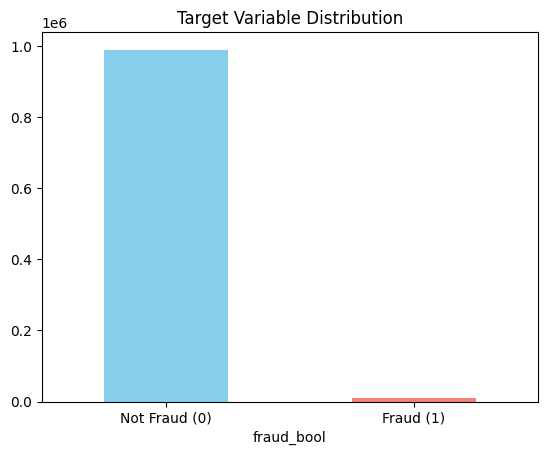

In [36]:
dataset["fraud_bool"].value_counts().plot(kind='bar',
    color=['skyblue', 'salmon'],
    title='Target Variable Distribution'
    )

plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

In [37]:
# Esta función muestra la relación entre una variable a elegir y la cantidad de fraudes
#Cambia el valor de TV_feature por la columna que quieras analizar
TV_feature = 'housing_status' 
fraud_by_x = dataset.groupby(TV_feature)['fraud_bool'].mean()
print(fraud_by_x)

housing_status
BA    0.037466
BB    0.006008
BC    0.006148
BD    0.008639
BE    0.003441
BF    0.004194
BG    0.003968
Name: fraud_bool, dtype: float64


month
0    0.011326
1    0.009387
2    0.008746
3    0.009222
4    0.011371
5    0.011825
6    0.013405
7    0.014746
Name: fraud_bool, dtype: float64


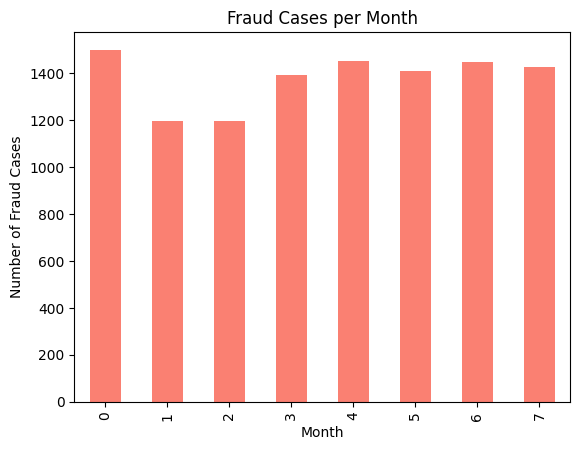

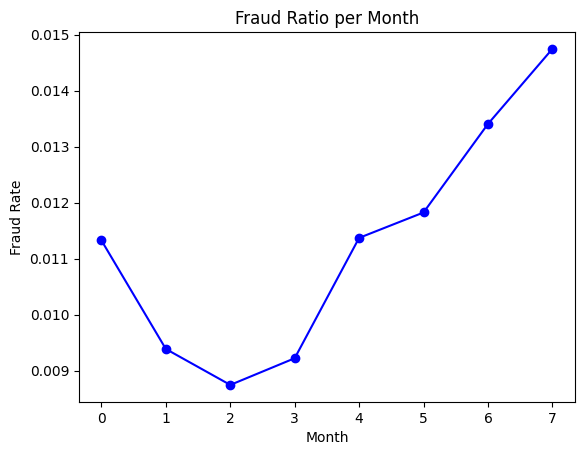

In [38]:
#Más analisis de tiempo

import matplotlib.pyplot as plt

fraud_counts = dataset.groupby('month')['fraud_bool'].sum()
nonfraud_counts = dataset.groupby('month')['fraud_bool'].count() - fraud_counts

fraud_by_month = dataset.groupby('month')['fraud_bool'].mean()

print(fraud_by_month)



fraud_counts.plot(kind='bar', color='salmon', title='Fraud Cases per Month')
plt.xlabel("Month")
plt.ylabel("Number of Fraud Cases")
plt.show()

# Fraud ratio per month
fraud_by_month.plot(kind='line', marker='o', color='blue', title='Fraud Ratio per Month')
plt.xlabel("Month")
plt.ylabel("Fraud Rate")
plt.show()


## Análisis de características numéricas

In [39]:
num_dataset = dataset.select_dtypes(include=['int64', 'float64'])
num_dataset = num_dataset.drop("fraud_bool", axis=1)

corrs = []
for column in num_dataset.columns:
    temp_corr = np.corrcoef(num_dataset[column], dataset['fraud_bool'])[0, 1]
    corrs.append((column, temp_corr))

max_corr_column, max_corr = max(corrs, key=lambda x: abs(x[1]))
    
print(f"Column with highest correlation to fraud_bool: {max_corr_column} (Correlation: {max_corr})")



Column with highest correlation to fraud_bool: credit_risk_score (Correlation: 0.07062363179618959)


c:\Users\menta\OneDrive\Documentos\SeptimoSemestre\IAprimerperiodo\Reto\KaggleMinions\kaggleMinions\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\menta\OneDrive\Documentos\SeptimoSemestre\IAprimerperiodo\Reto\KaggleMinions\kaggleMinions\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [55]:
#Estadísticas generales
#Cambia el valor de NV_Feature por alguna de las variable numéricas del dataset
NV_feature = 'has_other_cards' 
print(f"media: {dataset[NV_feature].mean()}")
print(f"mediana: {dataset[NV_feature].median()}")
print(f"desviación estándar: {dataset[NV_feature].std()}")
print(f"rango: {dataset[NV_feature].max() - dataset[NV_feature].min()}")
print(f"percentiles: \n {dataset[NV_feature].quantile([0.25, 0.5, 0.75])}")

media: 0.222988
mediana: 0.0
desviación estándar: 0.41625055569995956
rango: 1
percentiles: 
 0.25    0.0
0.50    0.0
0.75    0.0
Name: has_other_cards, dtype: float64


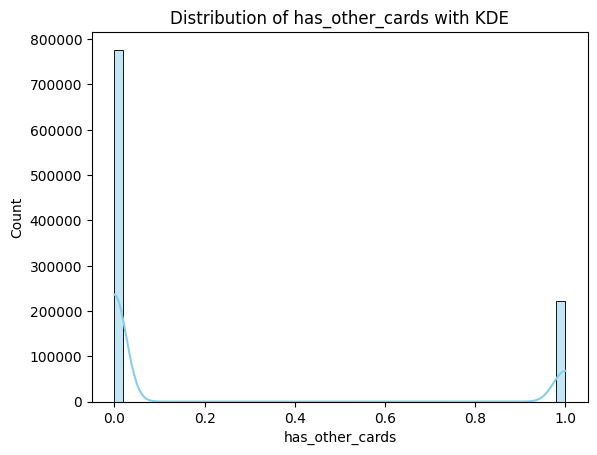

In [56]:
#Histograma y densidad de kernel

sns.histplot(dataset[NV_feature], bins=50, kde=True, color='skyblue')
plt.title(f'Distribution of {NV_feature} with KDE')
plt.show()

In [57]:
#Skewness and Kurtosis
values = dataset[NV_feature].dropna()

print("Skewness:", skew(values))
print("Kurtosis:", kurtosis(values))

Skewness: 1.3309874771952444
Kurtosis: -0.2284723355494389


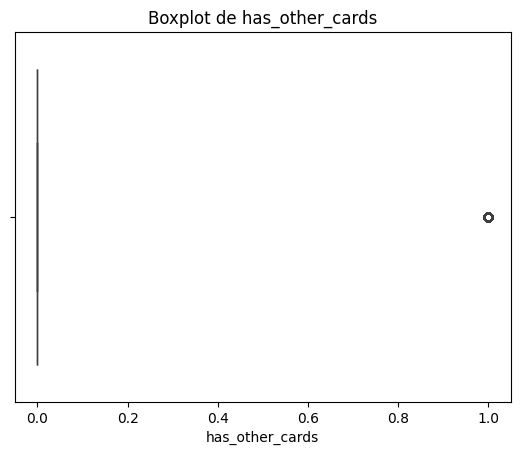

In [58]:
#Detección de outliers con BoxPlot 
sns.boxplot(x=dataset[NV_feature])
plt.title(f'Boxplot de {NV_feature}')
plt.show()

#Los outliers son los puntitos que salgan fuera del rango normal de existencia (1.5 * IQR)


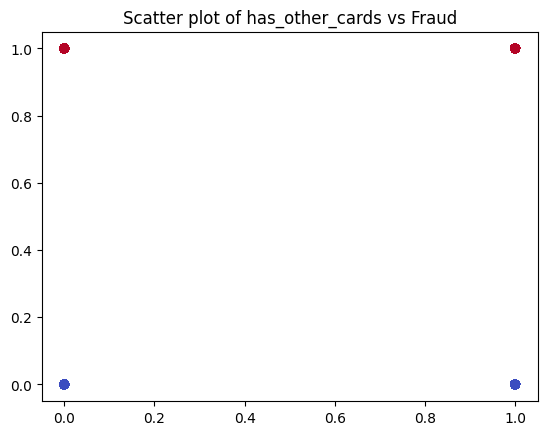

In [59]:

plt.scatter(x=dataset[NV_feature], y=dataset['fraud_bool'], c=dataset['fraud_bool'], cmap='coolwarm')
plt.title(f'Scatter plot of {NV_feature} vs Fraud')
plt.show()

## Análisis de variables categóricas

In [45]:
#Cambia el valor de CV_feature por alguna de las variable numéricas del dataset
CV_feature = "housing_status"

#Contar valores de las variables categoricas
print(f"Value counts for {CV_feature}:\n{dataset[CV_feature].value_counts()}")

print(f"Porcentaje de cada categoría en {CV_feature}:\n{dataset[CV_feature].value_counts(normalize=True) * 100}")


Value counts for housing_status:
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
Porcentaje de cada categoría en housing_status:
housing_status
BC    37.2143
BB    26.0965
BA    16.9675
BE    16.9135
BD     2.6161
BF     0.1669
BG     0.0252
Name: proportion, dtype: float64


A partir de aquí solo funciona si la variable categórica tiene una cantidad considerablemente pequeña de valores únicos

C:\Users\menta\AppData\Local\Temp\ipykernel_37872\3836610855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=CV_feature, data=dataset, palette='pastel')


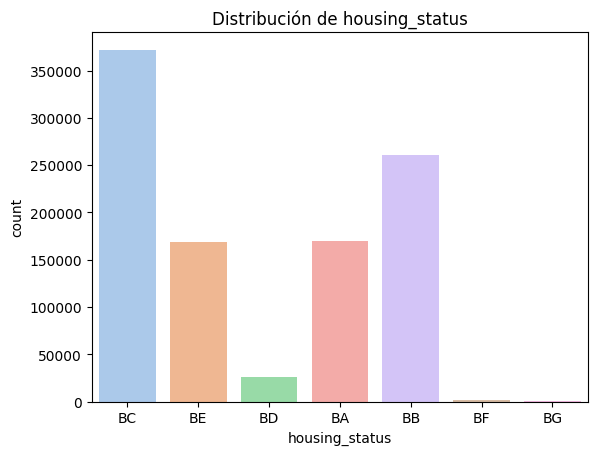

In [46]:
# Count plot

sns.countplot(x=CV_feature, data=dataset, palette='pastel')
plt.title(f'Distribución de {CV_feature}')
plt.show()


C:\Users\menta\AppData\Local\Temp\ipykernel_37872\3817690478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=CV_feature, y='fraud_bool', data=dataset, palette='Set2')


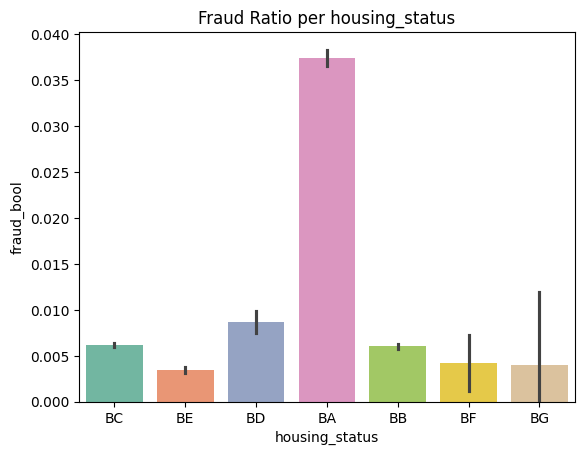

In [47]:

sns.barplot(x=CV_feature, y='fraud_bool', data=dataset, palette='Set2')
plt.title(f'Fraud Ratio per {CV_feature}')
plt.show()


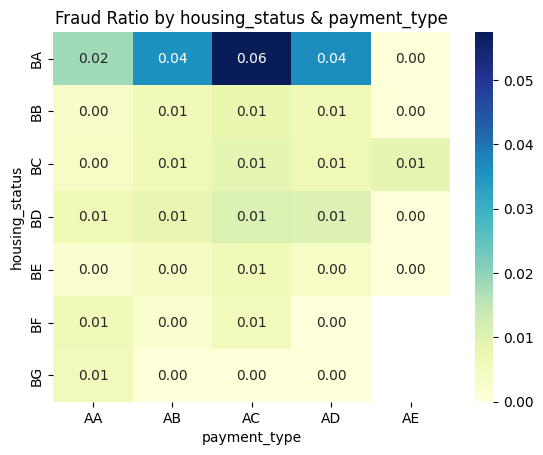

In [48]:
#Heatmap para ver la correlación de dos variables categóricas y el target

ComparativeVariable = 'payment_type'
fraud_table = dataset.groupby([CV_feature, ComparativeVariable])['fraud_bool'].mean().unstack()
sns.heatmap(fraud_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(f"Fraud Ratio by {CV_feature} & {ComparativeVariable}")
plt.show()


## Relaciones entre variables

c:\Users\menta\OneDrive\Documentos\SeptimoSemestre\IAprimerperiodo\Reto\KaggleMinions\kaggleMinions\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


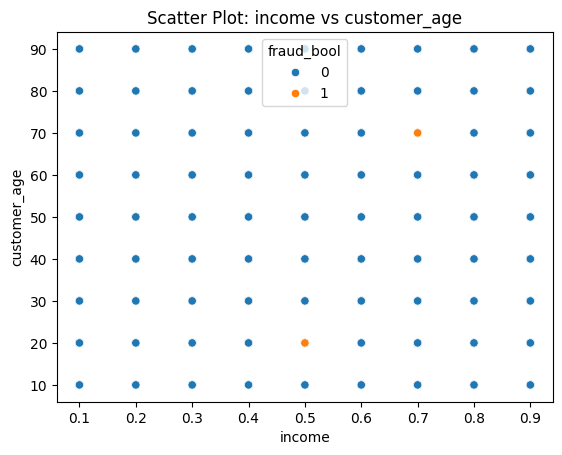

In [49]:
#ScatterPlot entre dos variables con la decisión de si es fraude coloreada 

V1 = 'income'
V2 = 'customer_age'

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot de dos variables
sns.scatterplot(
    x=V1, 
    y=V2, 
    hue='fraud_bool',   # colorea según fraude o no
    data=dataset
)
plt.title(f"Scatter Plot: {V1} vs {V2}")
plt.show()




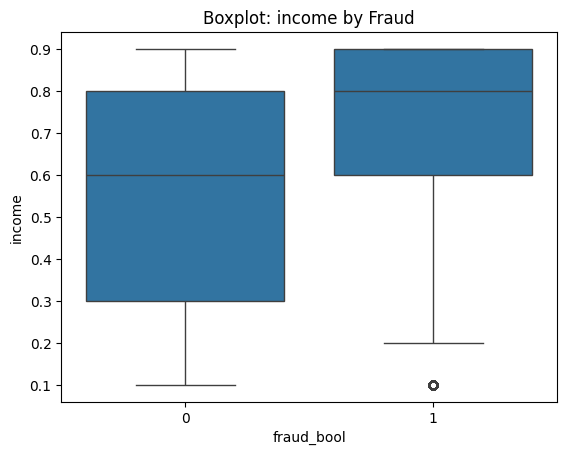

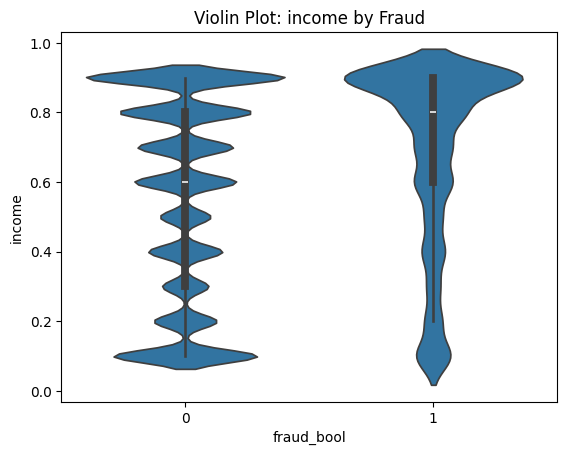

In [50]:
#Boxplot y violinplot

# Boxplot

V1 = 'income'
sns.boxplot(x='fraud_bool', y=V1, data=dataset)
plt.title(f"Boxplot: {V1} by Fraud")
plt.show()

# Violin plot
sns.violinplot(x='fraud_bool', y=V1, data=dataset)
plt.title(f"Violin Plot: {V1} by Fraud")
plt.show()


In [51]:
#Estadísticas por grupo

V1 = 'income'
V2 = 'customer_age'

# Media por clase
print(F"Media de {V1}: {dataset.groupby('fraud_bool')[V1].mean()}")

# Mediana por clase
print(F"Mediana de {V1}: {dataset.groupby('fraud_bool')[V1].median()}")

# Múltiples columnas
print(F"Mediana de {V1} y {V2}: \n {dataset.groupby('fraud_bool')[[V1, V2]].median()}")


Media de income: fraud_bool
0    0.561313
1    0.686635
Name: income, dtype: float64
Mediana de income: fraud_bool
0    0.6
1    0.8
Name: income, dtype: float64
Mediana de income y customer_age: 
             income  customer_age
fraud_bool                      
0              0.6          30.0
1              0.8          40.0


## Outliers y anomalias

In [52]:
#Z-score

OA_feature = 'customer_age' #Cambia a lo que quieras analizar

values = dataset[OA_feature]

# Calculamos Z-score
z_scores = np.abs(zscore(values))

# Definimos un umbral (por ejemplo 3)
outliers_z = dataset[z_scores > 3]
print(f"Número de outliers Z-score: {outliers_z.shape[0]}")

Número de outliers Z-score: 7890


In [53]:
Q1 = dataset[OA_feature].quantile(0.25)
Q3 = dataset[OA_feature].quantile(0.75)
IQR = Q3 - Q1

# Outliers = valores fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers_iqr = dataset[(dataset[OA_feature] < Q1 - 1.5*IQR) | 
                  (dataset[OA_feature] > Q3 + 1.5*IQR)]
print(f"Número de outliers IQR: {outliers_iqr.shape[0]}")


Número de outliers IQR: 1373
